<a href="https://colab.research.google.com/github/iiserkbikram/Classifying-newswires-a-multiple-classification-examples/blob/main/Classifying_Newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
print(tf.__version__)

2.9.2


# **The Reuters datasets**
Its a set of short newswires and their topics, published by Reuters in 1986. It's simple widely used dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topuc has at least 10 examples in the training set.


**Loading the data**

In [25]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words = 10000)

In [26]:
len(train_data)

8982

In [27]:
len(test_data)

2246

In [28]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

**Decoding the newswires back to text**

In [29]:
word_index = reuters.get_word_index()
reverse_word_index = dict ([(value,key) for (key,value) in word_index.items()])
decode_newswire = "".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
# Note that the indeces are offset by 3 beacause 0,1,2 are reserved indices for 'padding', 'start of the sequence', and 'unknown'

In [30]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [31]:
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [32]:
decode_newswire 

'???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3'

In [33]:
# The label associated with an example is an interger between o and 45 - a topic index;
train_labels[10]

3

# **Prepairing the data**

**Encoding the data**

In [34]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [35]:
# By one-hot encoding
import numpy as np

def to_one_hot(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

one_hot_train_labels = to_one_hot(train_data)
one_hot_test_labes = to_one_hot(test_data)

In [36]:
# Note that there is a built-in way to do this in Keras
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

**Building the Network**

In [37]:
# Model defination
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [38]:
# Compiling the model
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

**Validating the approach**

In [48]:
# Lets set apart 1,000 samples in the training data to use as a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [40]:
# Now let's train the network for 20 epochs
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 25ms/step - loss: 2.7560 - accuracy: 0.4584 - val_loss: 1.8345 - val_accuracy: 0.6520
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4773 - accuracy: 0.7119 - val_loss: 1.3309 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0717 - accuracy: 0.7809 - val_loss: 1.1387 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8394 - accuracy: 0.8276 - val_loss: 1.0341 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6714 - accuracy: 0.8636 - val_loss: 0.9570 - val_accuracy: 0.8110
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5357 - accuracy: 0.8915 - val_loss: 0.9416 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4323 - accuracy: 0.9108 - val_loss: 0.9155 - val_accuracy: 0.8090
Epoch 8/20
16

In [41]:
history_dic = history.history
history_dic.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

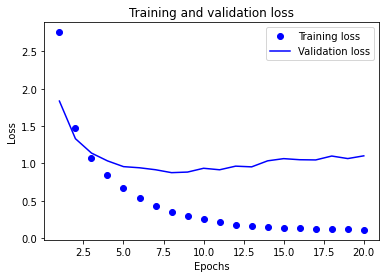

In [42]:
# Plotting the trian and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

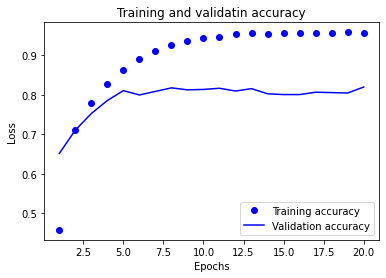

In [43]:
# Plotting the training and validation accuracy

plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label = "Validation accuracy")
plt.title("Training and validatin accuracy")
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()

plt.show()


**Observation**

The trainng accuaracy it increasing every epoch, and the training loss in decreasing with every epoch. That is what we would expect when running gradient descent optimization. However it is not the case with validation loss and accuracy: they seem to peak at nine epoch. We are seeiing overfitting (high varience).\
 To prevent overfitting, we should stop training after 9 epochs. 


**Retraining the model from scratch**

In [50]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs = 9,
          batch_size = 512,
          validation_data = (x_val,y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 29ms/step - loss: 2.4721 - accuracy: 0.5041 - val_loss: 1.6118 - val_accuracy: 0.6510
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.3535 - accuracy: 0.7116 - val_loss: 1.2540 - val_accuracy: 0.7250
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.0229 - accuracy: 0.7776 - val_loss: 1.1138 - val_accuracy: 0.7490
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8046 - accuracy: 0.8297 - val_loss: 1.0169 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6418 - accuracy: 0.8677 - val_loss: 0.9676 - val_accuracy: 0.7860
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5108 - accuracy: 0.8981 - val_loss: 0.9220 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4096 - accuracy: 0.9154 - val_loss: 0.9020 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [51]:
results

[0.970167338848114, 0.7898486256599426]

**Generating predictions on new data**

In [53]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [55]:
# Each entry in predictions is a vector of length 46
predictions[0].shape

(46,)

In [56]:
# The coefficient in this vector sum to 1:
np.sum(predictions[0])

1.0000001

In [58]:
# The largest argument in the prediction class - the class with highest probability
np.argmax(predictions[0])

3